# Исследование надежности заемщиков. <a id='intro'></a>

### Данные

В наличии были следующие данные клиентах банка:

- `children` — количество детей в семье;
- `days_employed` — общий трудовой стаж в днях;
- `dob_years` — возраст клиента в годах;
- `education` — уровень образования клиента;
- `education_id` — идентификатор уровня образования;
- `family_status` — семейное положение;
- `family_status_id` — идентификатор семейного положения;
- `gender` — пол клиента;
- `income_type` — тип занятости;
- `debt` — имел ли задолженность по возврату кредитов;
- `total_income` — ежемесячный доход;
- `purpose` — цель получения кредита;

## Получение данных

### Чтение файла

Импортируем библиотеку `pandas` и прочитаем файл /datasets/data.csv и сохраним его в переменной `df`:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('/datasets/data.csv')

Получим общую информацию о таблице:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Посмотрим на разброс значений в датафрейме и на первые 5 строк датафрейма.

In [4]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [5]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Теперь рассмотрим наши данные.

Всего в таблице **11** столбцов, типы данных - float64 (2), int64 (5), object (5).

Всего строк **21525**, однако в столбцах `days_employed` и `total_income` по **19351** значений. Это говорит о том, что во-первых, в этих столбцах присутсвуют пропущенные значения, а во-вторых, что у отстутствия этих значений может быть общая причина.

### Выводы по первому этапу

Каждая строка таблицы содержит информацию по отдельному клиенту банка, который обращался за кредитом. С точки зрения поставленной задачи, в первую очередь нас будут интересовать столбцы `children` и `family_status`, однако и в других столбцах может скрываться интересующая нас информация. Для начала нужно разобраться со следующими проблемами в данных: поправить названия столбцов, исследовать и отработать пропущенные значения, привести типы значений к единому формату (например в столбце `education`), а так же вынести их в словари, разобраться с отрицательными значениями в столбце `days_employed` и привести тип данных в столбцах к подходящему.

## Предобработка данных

### Заголовки и дубликаты

Для начала обработаем названия столбцов нашей таблицы.

In [6]:
df.columns # выведем названия столбцов

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

Видим, что с точки зрения формата проблем нет: названия столбцов написаны в нижнем регистре, с подчёркиваниями вместо пробелов, лишних пробелов или иных символов нет. Однако, названия столбцов не совсем корректно отображают их содержание, поэтому заменим их:

In [7]:
# переименуем столбцы
df.set_axis(['number_of_children', 'days_employed', 'age_in_years', 
             'education_level', 'education_level_id', 
             'family_status', 'family_status_id', 'sex', 
             'employment_type', 'failed_to_pay_debt', 'monthly_income', 
             'credit_purpose'], axis = 'columns', inplace = True)

Проверим, успешно ли прошло переименование:

In [8]:
df.columns # еще раз выведем названия столбцов

Index(['number_of_children', 'days_employed', 'age_in_years',
       'education_level', 'education_level_id', 'family_status',
       'family_status_id', 'sex', 'employment_type', 'failed_to_pay_debt',
       'monthly_income', 'credit_purpose'],
      dtype='object')

Теперь заголовки столбцов в таблице выглядят так:

* `number_of_children` — количество детей в семье;
* `days_employed` — общий трудовой стаж в днях;
* `age_in_years` — возраст клиента в годах;
* `education_level` — уровень образования клиента;
* `education_level_id` — идентификатор уровня образования;
* `family_status` — семейное положение;
* `family_status_id` — идентификатор семейного положения;
* `sex` — пол клиента;
* `employment_type` — тип занятости;
* `failed_to_pay_debt` — имел ли задолженность по возврату кредитов;
* `monthly_income` — ежемесячный доход;
* `credit_purpose` — цель получения кредита.


Кроме того, перед обработкой остальных данных, приведем все столбцы с типом **object** (`education_level`, `family_status`, `sex`, `employment_type` и `credit_purpose`) к нижнему регистру:

In [9]:
df['education_level'] = df['education_level'].str.lower()
df['family_status'] = df['family_status'].str.lower()
df['sex'] = df['sex'].str.lower()
df['employment_type'] = df['employment_type'].str.lower()
df['credit_purpose'] = df['credit_purpose'].str.lower()

### Пропущенные значения

Проверим наличие пропущенных значений в таблице:

In [10]:
df.isnull().sum() # считаем все пропущенные значения

number_of_children       0
days_employed         2174
age_in_years             0
education_level          0
education_level_id       0
family_status            0
family_status_id         0
sex                      0
employment_type          0
failed_to_pay_debt       0
monthly_income        2174
credit_purpose           0
dtype: int64

Как видим, значения пропущены в столбцах `days_employed` и `monthly_income`. Проверим, связаны ли эти пропуски между собой:

In [11]:
# Ищем такие строки в таблице, 
# чтобы И в столбце days_employed И в столбце monthly_income 
# были пропущенные значения
df[(df['days_employed'].isnull() == True) & 
   (df['monthly_income'].isnull() == True)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 12 to 21510
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   number_of_children  2174 non-null   int64  
 1   days_employed       0 non-null      float64
 2   age_in_years        2174 non-null   int64  
 3   education_level     2174 non-null   object 
 4   education_level_id  2174 non-null   int64  
 5   family_status       2174 non-null   object 
 6   family_status_id    2174 non-null   int64  
 7   sex                 2174 non-null   object 
 8   employment_type     2174 non-null   object 
 9   failed_to_pay_debt  2174 non-null   int64  
 10  monthly_income      0 non-null      float64
 11  credit_purpose      2174 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 220.8+ KB


Получился DataFrame с **2174** строками. Столько же пропущенных значений в каждом из столбцов `days_employed` и `monthly_income` в оригинальной таблице. То есть, значения в этих столбцах отсутствуют попарно, а строк с отсутвующим значением только в одном из столбцов нет. Таким образом, наиболее правдоподобной будет версия, что пропуски в этих значениях имеют общее происхождение.

In [12]:
# выведем первые 10 строк с пропущенными значениями на экран
df[df.isnull().any(axis = 1)].head(10)

,number_of_children,days_employed,age_in_years,education_level,education_level_id,family_status,family_status_id,sex,employment_type,failed_to_pay_debt,monthly_income,credit_purpose
12,0,NaN,65,среднее,1,гражданский брак,1,m,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,m,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,не женат / не замужем,4,f,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,f,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,f,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,не женат / не замужем,4,m,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,f,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,m,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,f,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,m,сотрудник,0,NaN,жилье


При этом, как видно даже из первых 10 строк таблицы, зависимости пропусков от других значений не наблюдается. Все остальные столбцы наполнены разнообразной информацией. Таким образом, эти пропуски случайны. Скорее всего их появление связано с технической неисправностью или с ошибкой оператора базы данных, при этом возможно их появление зависит от какого-то другого параметра, не указанного в этой таблице.

Теперь заполним пустые значения.

In [13]:
df['days_employed']=df['days_employed'].fillna(value = df["days_employed"].median())
df['monthly_income']=df['monthly_income'].fillna(value = df["monthly_income"].median())

Далее проверим заполненность значений.

In [14]:
df.isnull().sum()

number_of_children    0
days_employed         0
age_in_years          0
education_level       0
education_level_id    0
family_status         0
family_status_id      0
sex                   0
employment_type       0
failed_to_pay_debt    0
monthly_income        0
credit_purpose        0
dtype: int64

Преобразуем тип данных в столбце `monthly_income` в целочисленный.

In [15]:
df['monthly_income'] = df['monthly_income'].astype('int')

In [16]:
#Проверим тип данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   number_of_children  21525 non-null  int64  
 1   days_employed       21525 non-null  float64
 2   age_in_years        21525 non-null  int64  
 3   education_level     21525 non-null  object 
 4   education_level_id  21525 non-null  int64  
 5   family_status       21525 non-null  object 
 6   family_status_id    21525 non-null  int64  
 7   sex                 21525 non-null  object 
 8   employment_type     21525 non-null  object 
 9   failed_to_pay_debt  21525 non-null  int64  
 10  monthly_income      21525 non-null  int64  
 11  credit_purpose      21525 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.0+ MB


На этом этапе мы завершили обработку пропущенных значений. Однако есть еще несколько моментов, требующих нашего внимания.

### Аномальные значения

Кроме собственно пропущенных, пустых значений, в таблице присутствуют и аномальные значения, которые противоречат здравому смыслу и выглядят выбивающимися из общей картины (отрицательное или большое количество детей, отрицательный или слишком большой трудовой стаж).

Возьмём, например, количество детей (столбец `number_of_children`):

In [17]:
# создадим сводную таблицу и разделим на промежутки
df['groups'] = pd.cut(df['number_of_children'],[-999,-1,0,5,999])
# посчитаем количество значений и среднее по указанным промежуткам
df.groupby('groups')['number_of_children'].agg(['count','mean'])

,count,mean
groups,,
"(-999, -1]",47,-1.00000
"(-1, 0]",14149,0.00000
"(0, 5]",7253,1.39625
"(5, 999]",76,20.00000


Видно, что подавляющее большинство значений находятся в рамках разумного, однако в 47 случаях количество детей отрицательное (при этом ровно -1), а в 76 случаях - ровно 20. Уберём эти аномалии и приравняем оба этих значения к нулю.

In [18]:
# заменим значения ниже нуля на ноль
df.loc[(df['number_of_children'] < 0), 'number_of_children'] = 0
# заменим значения равные 20 на ноль
df.loc[(df['number_of_children'] == 20), 'number_of_children'] = 0

Снова проверим распределение значений:

In [19]:
# создадим сводную таблицу и разделим на промежутки
df['groups'] = pd.cut(df['number_of_children'],[-999,-1,0,5,999])
# посчитаем количество значений и среднее по указанным промежуткам
df.groupby('groups')['number_of_children'].agg(['count','mean'])

,count,mean
groups,,
"(-999, -1]",0,NaN
"(-1, 0]",14272,0.00000
"(0, 5]",7253,1.39625
"(5, 999]",0,NaN


Мы преобразовали аномальные значения, и теперь данные выглядят более адекватно.

Возьмём следующий столбец `days_employed`:

In [20]:
# создадим сводную таблицу и разделим на промежутки, возьмем за отправную точку условный стажж в 82 года работы.
#Считая, что человек начал работать с 18 лет и проработал 82 года до 100 лет - 29930 дней.
df['groups'] = pd.cut(df['days_employed'],[-999999,-1,0,29930,999999])
# посчитаем количество значений и среднее по указанным промежуткам
#df.groupby('groups')['days_employed'].agg(['count','mean','median','min','max'])
df.groupby('groups')['age_in_years'].agg(['count','mean','median','min','max'])

,count,mean,median,min,max
groups,,,,,
"(-999999, -1]",18080,40.276825,40.0,0.0,75.0
"(-1, 0]",0,NaN,NaN,NaN,NaN
"(0, 29930]",0,NaN,NaN,NaN,NaN
"(29930, 999999]",3445,59.124819,60.0,0.0,74.0


Импортируем библиотеку `matplotlib.pyplot` и сделаем гистограмму:

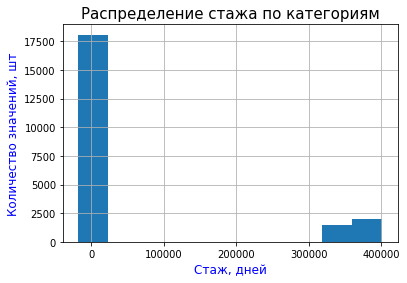

In [21]:

df['days_employed'].hist() # построим гистограмму
plt.title('Распределение стажа по категориям', fontsize=15)
plt.xlabel('Стаж, дней', fontsize=12, color='blue')
plt.ylabel('Количество значений, шт', fontsize=12, color='blue')
plt.grid(True)

Видим ещё одно аномальное распределение. Подавляющее большинство значений находятся в промежутке от **-19000** до **0**, но при этом **3445** значения оказались положительными и на порядок больше по модулю. Допустим, что действительный стаж оказался по каким-то причинам отрицательным числом.

Возьмём самое большое по модулю значение из первой группы:

In [22]:
18388.949901 / 365 # переведем дни в годы

50.38068466027397

Стаж в 50 лет кажется значительным, но при этом допустимым. Всё-таки это наибольшее по модулю число в этой группе.

Теперь посмотрим на наименьшее число из второй группы:

In [23]:
328728.720605 / 365 # переведем дни в годы

900.6266317945204

Стаж более 900 лет. Это явная аномалия в данных, которая может исказить дальнейшие рез-ты исследования.

Посмотрим на данные еще раз. 
В первой группе - у нас адекватный стаж в годах(по модулю), списываем это на ошибку ввода данных оператором при переносе значений.
Во второй группе стаж в годах от 900 лет, а таких значений - 3445 - это достаточно существенная часть от всего датафрейма. Предположим, что на самом деле данным во второй группе указаны в часах и проверим эту гипотезу.

In [24]:
328728.720605 / (24*365) # переведём в часы в годы

37.52610965810502

Действительно, получается намного более правдиво. Теперь это можно назвать стажем. Получается, этих людей записывали в другом формате — возможно это устаревший формат, либо данные некорректно перенесены из другой системы. Напишем функцию, преобазующую стаж в нормальный формат:

In [25]:
# функция для перевода значений из часов в дни
def hours_to_days(df):
    if df['days_employed'] > 0:
        return df['days_employed'] / -24
    else:
        return df['days_employed']

Предварительно посмотрим как значения распределены на графике:

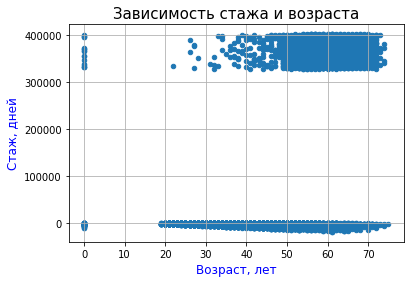

In [26]:
# строим scatter-график
df.plot.scatter(x='age_in_years', y='days_employed')
plt.title('Зависимость стажа и возраста', fontsize=15)
plt.xlabel('Возраст, лет', fontsize=12, color='blue')
plt.ylabel('Стаж, дней', fontsize=12, color='blue')
plt.grid(True)

Теперь применим её к таблице:

In [27]:
# применяем функцию к таблице
df['days_employed'] = df.apply(hours_to_days, axis=1)

Посмотрим, как изменился наш график:

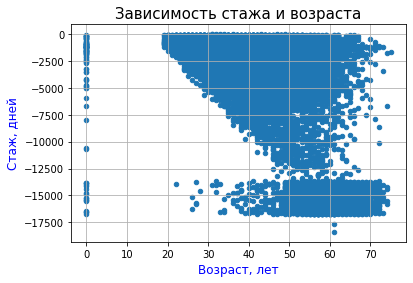

In [28]:
# строим scatter-график
df.plot.scatter(x='age_in_years', y='days_employed')
plt.title('Зависимость стажа и возраста', fontsize=15)
plt.xlabel('Возраст, лет', fontsize=12, color='blue')
plt.ylabel('Стаж, дней', fontsize=12, color='blue')
plt.grid(True)

Видим, что у нас есть две группы значений, которые сильно выбиваются из общего ряда. Для начала раберёмся с той группой, где возраст равен нулю. Изначально мы проставляли возраст по медиане соответствующего типа занятости. В этот раз попробуем использовать стаж для предположения возраста. Посмотрим коэффициенты корреляции:

In [29]:
# вызываем таблицу с коэффициентами корреляции
df.corr()

,number_of_children,days_employed,age_in_years,education_level_id,family_status_id,failed_to_pay_debt,monthly_income
number_of_children,1.000000,0.223480,-0.310068,-0.027572,-0.157682,0.024951,0.029996
days_employed,0.223480,1.000000,-0.587416,-0.065740,0.021315,0.064488,0.098849
age_in_years,-0.310068,-0.587416,1.000000,0.067467,-0.069988,-0.069620,-0.050689
education_level_id,-0.027572,-0.065740,0.067467,1.000000,0.007876,0.052906,-0.169121
family_status_id,-0.157682,0.021315,-0.069988,0.007876,1.000000,0.020611,-0.008697
failed_to_pay_debt,0.024951,0.064488,-0.069620,0.052906,0.020611,1.000000,-0.011592
monthly_income,0.029996,0.098849,-0.050689,-0.169121,-0.008697,-0.011592,1.000000


Как видим, корреляция между возрастом и стажем на порядок выше, чем между возрастом и типом занятости.

Напишем функцию для предположения возраста. Функция будет заменять нулевой возраст на случайное значение между максимальным возрастом и минимальным возрастом для имеющегося стажа:

In [30]:
#импортируем библиотеку random
import random

# определяем "константу" с максимальным возрастом
max_age = df['age_in_years'].max()

# создаём функцию для замены нулевого возраста
def zero_to_age(df):
    if df['age_in_years'] == 0:
        min = int(df['days_employed'] / -365 + 18)
        max = max_age
        return random.randint(min,max)
    else:
        return df['age_in_years']

Применим функцию на таблице:

In [31]:
# применяем функцию к таблице
df['age_in_years'] = df.apply(zero_to_age, axis=1)

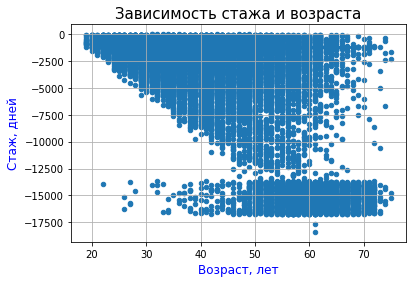

In [32]:
# строим scatter-график
df.plot.scatter(x='age_in_years', y='days_employed')
plt.title('Зависимость стажа и возраста', fontsize=15)
plt.xlabel('Возраст, лет', fontsize=12, color='blue')
plt.ylabel('Стаж, дней', fontsize=12, color='blue')
plt.grid(True)

Теперь график выглядит намного лучше! Осталась одна группа, которая не вписывается в рамки. Попробуем с ней разобраться.

Для начала создадим новый столбец, в котором посчитаем разницу между возрастом и стажем:

In [33]:
# создаём столбец с разницей возраста и стажа
df['delta'] = df['age_in_years'] - (18 + df['days_employed'] / -365)

Теперь посчитаем количество строк, в которых стаж больше возраста.

In [34]:
# считаем количество строк где стаж больше возраста
df[df['delta'] < 0].count()

number_of_children    2146
days_employed         2146
age_in_years          2146
education_level       2146
education_level_id    2146
family_status         2146
family_status_id      2146
sex                   2146
employment_type       2146
failed_to_pay_debt    2146
monthly_income        2146
credit_purpose        2146
groups                2146
delta                 2146
dtype: int64

Заодно посмотрим на средние и крайние значения:

In [35]:
# выводим среднее, наименьшее и наибольшие значения для строк где стаж юольше возраста
df[df['delta'] < 0]['delta'].agg(['mean','min','max'])

mean    -4.598620
min    -36.451731
max     -0.000338
Name: delta, dtype: float64

Возможно в этих значениях присутствует ошибка, другой вариант — часть значений может относиться к тем, у кого стаж засчитывается с коэффициентом. С другой стороны, если стаж превышает возраст аж на 36 лет, то это аномалия.

Попробуем расправиться с этими значениями таким образом: "отзеркалим" все возможные значения, то есть сделаем стаж меньше на то же значение, на которое стаж первышал возраст. Если же стаж в таком случае окажется отрицательным, тогда просто вычтем из стажа разницу с возрастом.

In [36]:
# создаём функцию для преобразования значений находящихся за пределами допустимых
def overemployment(df):
    if (df['delta'] < 0) & (df['days_employed'] < (df['delta'] * 2 * 365)):
        return df['days_employed'] - (df['delta'] * 2 * 365)
    elif (df['delta'] < 0) & (df['days_employed'] > (df['delta'] * 2 * 365)):
        return (df['days_employed'] - (df['delta'] * 365))
    else:
        return df['days_employed']

Применим эту функцию к таблице:

In [37]:
# применяем функцию к таблице
df['days_employed'] = df.apply(overemployment, axis=1)

И взглянем на график:

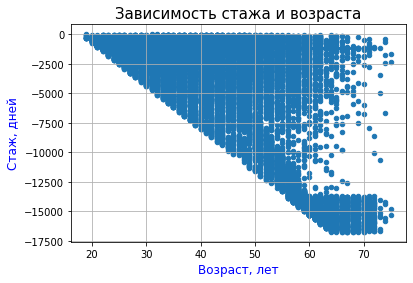

In [38]:
# строим scatter-график
df.plot.scatter(x='age_in_years', y='days_employed')
plt.title('Зависимость стажа и возраста', fontsize=15)
plt.xlabel('Возраст, лет', fontsize=12, color='blue')
plt.ylabel('Стаж, дней', fontsize=12, color='blue')
plt.grid(True)

Отлично! Мы избавились от аномальных значений, но значения трудового стажа всё ещё отрицательные. Преобразуем же значения:

In [39]:
# берём значения столбца по модулю
df['days_employed'] = df['days_employed'].abs()

Ещё раз взглянем на график:

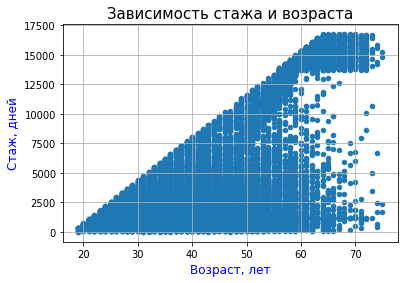

In [40]:
# строим scatter-график
df.plot.scatter(x='age_in_years', y='days_employed')
plt.title('Зависимость стажа и возраста', fontsize=15)
plt.xlabel('Возраст, лет', fontsize=12, color='blue')
plt.ylabel('Стаж, дней', fontsize=12, color='blue')
plt.grid(True)

Таким образом, мы разобрались с пропущенными значениями.

### Изменение типа данных

Снова обратимся к общей информации по таблице:

In [41]:
df.info() # получим общую информацию о таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   number_of_children  21525 non-null  int64   
 1   days_employed       21525 non-null  float64 
 2   age_in_years        21525 non-null  int64   
 3   education_level     21525 non-null  object  
 4   education_level_id  21525 non-null  int64   
 5   family_status       21525 non-null  object  
 6   family_status_id    21525 non-null  int64   
 7   sex                 21525 non-null  object  
 8   employment_type     21525 non-null  object  
 9   failed_to_pay_debt  21525 non-null  int64   
 10  monthly_income      21525 non-null  int64   
 11  credit_purpose      21525 non-null  object  
 12  groups              21525 non-null  category
 13  delta               21525 non-null  float64 
dtypes: category(1), float64(2), int64(6), object(5)
memory usage: 2.2+ MB


In [42]:
# удаляем лишний столбец groups
df.drop('groups', axis = 1, inplace = True)

In [43]:
df.info() # получим общую информацию о таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   number_of_children  21525 non-null  int64  
 1   days_employed       21525 non-null  float64
 2   age_in_years        21525 non-null  int64  
 3   education_level     21525 non-null  object 
 4   education_level_id  21525 non-null  int64  
 5   family_status       21525 non-null  object 
 6   family_status_id    21525 non-null  int64  
 7   sex                 21525 non-null  object 
 8   employment_type     21525 non-null  object 
 9   failed_to_pay_debt  21525 non-null  int64  
 10  monthly_income      21525 non-null  int64  
 11  credit_purpose      21525 non-null  object 
 12  delta               21525 non-null  float64
dtypes: float64(2), int64(6), object(5)
memory usage: 2.1+ MB


Теперь взглянем на типы данных:

Возьмём столбцы с типом данных int:

В целом, выглядит логично, количество детей, id - всё это целые числа. Взглянем на столбец должников:

In [44]:
# посчитаем количество значений по категориям
df.groupby('failed_to_pay_debt')['failed_to_pay_debt'].count()

failed_to_pay_debt
0    19784
1     1741
Name: failed_to_pay_debt, dtype: int64

Всего два значения, которые даже по смыслу напрашиваются на замену на булевы значения. Так давайте так и сделаем:

In [45]:
# преобразуем тип данных
df['failed_to_pay_debt'] = df['failed_to_pay_debt'].astype('bool')

Посмотрим, получилось ли изменить тип данных:

In [46]:
df.info() # получим общую информацию о таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   number_of_children  21525 non-null  int64  
 1   days_employed       21525 non-null  float64
 2   age_in_years        21525 non-null  int64  
 3   education_level     21525 non-null  object 
 4   education_level_id  21525 non-null  int64  
 5   family_status       21525 non-null  object 
 6   family_status_id    21525 non-null  int64  
 7   sex                 21525 non-null  object 
 8   employment_type     21525 non-null  object 
 9   failed_to_pay_debt  21525 non-null  bool   
 10  monthly_income      21525 non-null  int64  
 11  credit_purpose      21525 non-null  object 
 12  delta               21525 non-null  float64
dtypes: bool(1), float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Взглянем и на сами значения:

In [47]:
# посчитаем количество значений по категориям
df.groupby('failed_to_pay_debt')['failed_to_pay_debt'].count()

failed_to_pay_debt
False    19784
True      1741
Name: failed_to_pay_debt, dtype: int64

Тип данных изменился, теперь взглянем на столбцы с типом данных float:

Видно, что для дней и годов тип данных float не очень то и подходит, для дохода допустимо использовать float. К тому же у нас есть пропущенное значение NaN, которое не применяется в тип данных int. Изменим тип данных столбцов days_employed, age_in_years на int:

In [48]:
# преобразуем тип данных
df['days_employed'] = df['days_employed'].astype('int')
df['age_in_years'] = df['age_in_years'].astype('int')

In [49]:
df.info() # получим общую информацию о таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   number_of_children  21525 non-null  int64  
 1   days_employed       21525 non-null  int64  
 2   age_in_years        21525 non-null  int64  
 3   education_level     21525 non-null  object 
 4   education_level_id  21525 non-null  int64  
 5   family_status       21525 non-null  object 
 6   family_status_id    21525 non-null  int64  
 7   sex                 21525 non-null  object 
 8   employment_type     21525 non-null  object 
 9   failed_to_pay_debt  21525 non-null  bool   
 10  monthly_income      21525 non-null  int64  
 11  credit_purpose      21525 non-null  object 
 12  delta               21525 non-null  float64
dtypes: bool(1), float64(1), int64(6), object(5)
memory usage: 2.0+ MB


На этом мы заканчиваем преобразование типов данных и переходим к категорированию.

### Категоризация данных

Нам необходимо сгруппировать различные цели получения кредита для более наглядного восприятия данных. Посмотрим сколько на текущий момент содержится в таблице различных целей получения кредита:

In [50]:
df.groupby('credit_purpose')['credit_purpose'].count().count() # считаем количество категорий

38

Давайте посмотрим с какими же целями клиенты обращаются за дополнительным финансированием в банк:

In [51]:
df.groupby('credit_purpose')['credit_purpose'].count() # выводим на экран список категорий

credit_purpose
автомобили                                478
автомобиль                                495
высшее образование                        453
дополнительное образование                462
жилье                                     647
заняться высшим образованием              496
заняться образованием                     412
на покупку автомобиля                     472
на покупку подержанного автомобиля        479
на покупку своего автомобиля              505
на проведение свадьбы                     777
недвижимость                              634
образование                               447
операции с жильем                         653
операции с коммерческой недвижимостью     651
операции с недвижимостью                  676
операции со своей недвижимостью           630
покупка жилой недвижимости                607
покупка жилья                             647
покупка жилья для сдачи                   653
покупка жилья для семьи                   641
покупка коммерческо

Оказывается не так уж и разнообразны предпочтения у клиентов банка. 38 разных формулировок похожих запросов. Напишем функцию для категоризации по целям. Но для начала определим эти категории.

In [52]:
auto_id = 'операции с автомобилем'
estate_id = 'операции с недвижимостью'
wedding_id = 'проведение свадьбы'
edu_id = 'получение образования'

Пишем функцию для категоризации. Выделив 4 ключевых слова:
* недвижимость (жилье)
* автомобиль
* образование
* свадьба

In [53]:
def purpose_categorizer(row):
    if 'недвиж' in row['credit_purpose'] or 'жил' in row['credit_purpose']:
        return estate_id
    elif 'авто' in row['credit_purpose']:
        return auto_id
    elif 'образов' in row['credit_purpose']:
        return edu_id
    elif 'свадь' in row['credit_purpose']:
        return wedding_id

Теперь применим эту функцию к нашей таблице.

In [54]:
# применим функцию к таблице и сохраним результат в новый столбец
df['purpose_category'] = df.apply(purpose_categorizer, axis = 1)

In [55]:
df.head()

,number_of_children,days_employed,age_in_years,education_level,education_level_id,family_status,family_status_id,sex,employment_type,failed_to_pay_debt,monthly_income,credit_purpose,delta,purpose_category
0,1,8437,42,высшее,0,женат / замужем,0,f,сотрудник,False,253875,покупка жилья,0.883088,операции с недвижимостью
1,1,4024,36,среднее,1,женат / замужем,0,f,сотрудник,False,112080,приобретение автомобиля,6.973140,операции с автомобилем
2,0,5326,33,среднее,1,женат / замужем,0,m,сотрудник,False,145885,покупка жилья,-0.406637,операции с недвижимостью
3,3,4124,32,среднее,1,женат / замужем,0,m,сотрудник,False,267628,дополнительное образование,2.699323,получение образования
4,0,11372,53,среднее,1,гражданский брак,1,f,пенсионер,False,158616,сыграть свадьбу,-3.843159,проведение свадьбы


Теперь сделаем словарь для семейного положения:

In [56]:
# добавим в переменную family_status_dict столбцы 'family_status' и 'family_status_id' из основной таблицы
family_status_dict = df[['family_status_id', 'family_status']]
# избавимся от дубликатов
family_status_dict = family_status_dict.drop_duplicates().reset_index(drop = True)
# выведем словарь на экран
family_status_dict

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,не женат / не замужем


Теперь уберём столбцы с названиями этих категорий из основной таблицы:

In [57]:
# уберём из основной таблицы названия категорий по уровню образования и семейному положению
df = df[['number_of_children',
         'days_employed',
         'age_in_years',
         'education_level_id',
         'family_status_id',
         'sex',
         'employment_type',
         'failed_to_pay_debt',
         'monthly_income',
         'purpose_category'
        ]]

Взглянем на информацию о таблице:

In [58]:
df.info() # получим общую информацию о таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   number_of_children  21525 non-null  int64 
 1   days_employed       21525 non-null  int64 
 2   age_in_years        21525 non-null  int64 
 3   education_level_id  21525 non-null  int64 
 4   family_status_id    21525 non-null  int64 
 5   sex                 21525 non-null  object
 6   employment_type     21525 non-null  object
 7   failed_to_pay_debt  21525 non-null  bool  
 8   monthly_income      21525 non-null  int64 
 9   purpose_category    21525 non-null  object
dtypes: bool(1), int64(6), object(3)
memory usage: 1.5+ MB


Кроме этих столбцов у нас есть еще два столбца, которые можно категорировать. Например, по количеству детей можно выделить категории бездетных (0 детей), малодетных (от 0 до 3 детей) и многодетных (3 и более детей). Для этого опишем специальную функцию:

In [59]:
# определим функцию для категоризации в зависимости от количества детей
def children_categorizer(row):
    if row['number_of_children'] == 0:
        return 0
    elif (row['number_of_children'] > 0) and (row['number_of_children'] < 3):
        return 1
    elif (row['number_of_children'] >= 3):
        return 2

Теперь применим эту функцию к таблице и сохраним результат в отдельный столбец `number_of_children_id`:

In [60]:
# применим функцию к таблице и сохраним результат в новый столбец
df['number_of_children_id'] = df.apply(children_categorizer, axis = 1)

Проверим, получилось ли создать новый столбец. Выведем на экран сгруппированную по категориям сводку:

In [61]:
# выведем на экран новые категории
df.groupby('number_of_children_id')['number_of_children_id'].count()

number_of_children_id
0    14272
1     6873
2      380
Name: number_of_children_id, dtype: int64

Также мы можем провести категорирование по столбцу monthly_income. 
Напишем функцию, которая разделит данные на следующие категории:
* `E` - 0 - 30000
* `D` - 30001 - 50000
* `C` - 50001 - 200000
* `B` - 200001 - 1000000
* `A` - 1000001 и выше

In [62]:
def income_categorizer(row):
    if row['monthly_income'] < 30000:
        return "E"
    elif 30001 <= row['monthly_income'] <= 50000:
        return "D"
    elif 50001<= row['monthly_income'] <= 200000:
        return "C"
    elif 200001<= row['monthly_income'] <= 1000000:
        return "B"
    elif row['monthly_income'] >= 1000001:
        return "A"

Применим функцию к таблице и сохраним результат в столбце `monthly_income_id`:

In [63]:
# присваиваем столбцу результат применения функции к таблице
df['monthly_income_id'] = df.apply(income_categorizer, axis = 1)

Проверим, получилось ли создать новый столбец. Выведем на экран сгруппированную по категориям сводку:

In [64]:
# выведем на экран результат присвоения новых id
df.groupby('monthly_income_id')['monthly_income_id'].count()

monthly_income_id
A       25
B     5041
C    16087
D      350
E       22
Name: monthly_income_id, dtype: int64

Создадим словарь, сохраним в переменной `monthly_income_dict` и выведем его на экран:

In [65]:
# создадим таблицу-словарь
monthly_income_dict = pd.DataFrame.from_dict({
    'monthly_income_id': ['A', 'B', 'C', 'D', 'E'], 
    'monthly_income_type': ['1000001 и выше', '200001 - 1000000', '50001 - 200000', '30001 - 50000', '0 - 30000']
})
# и выведем её на экран
monthly_income_dict

,monthly_income_id,monthly_income_type
0,A,1000001 и выше
1,B,200001 - 1000000
2,C,50001 - 200000
3,D,30001 - 50000
4,E,0 - 30000


## Проверка гипотез

Теперь нам необходимо использовать предобработанные данные для ответа на следующие вопросы:

- Есть ли зависимость между наличием детей и возвратом кредита в срок?
- Есть ли зависимость между семейным положением и возвратом кредита в срок?
- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
- Как разные цели кредита влияют на его возврат в срок?

Для начала оценим среднюю вероятность невозврата кредита в срок для всех клиентов:

In [66]:
# выведем на экран строку и отформатируем среднее по столбцу `failed_to_pay_debt` в процентах с двумя знаками после запятой
print('Средняя вероятность невозврата кредита в срок: {:.2%}'.format(df['failed_to_pay_debt'].mean()))

Средняя вероятность невозврата кредита в срок: 8.09%


Теперь посмотрим как зависит вероятность невозврата кредита в срок от различных параметров.

### 3.1 Как влияет наличие детей на возврат кредита в срок?

Мы уже разделили клиентов на три категории в зависимости от количества детей. Теперь посмотрим какая вероятность невозврата кредита в срок для каждой из категорий:

In [67]:
# создаём сводную таблицу и сохраняем её в переменную
#children_guess = df.groupby('number_of_children_id')['failed_to_pay_debt'].agg(['count', 'mean'])
children_guess = df.pivot_table(index=['number_of_children_id'], values='failed_to_pay_debt', aggfunc='count')
children_guess['mean'] = df.groupby('number_of_children_id')['failed_to_pay_debt'].agg(['mean'])
# сортируем значения в порядке убывания
children_guess.sort_values(by = ['mean'], ascending = False)

,failed_to_pay_debt,mean
number_of_children_id,,
1,6873,0.092827
2,380,0.081579
0,14272,0.075112


Как видим, клиенты с детьми в среднем не возвращают долг в срок чаще, чем бездетные. При этом вероятность невозврата и для малодетных и для многодетных клиентов выше средней.

### С какой веротностью вернут кредит в срок клиенты с разным семейным положением?

Теперь оценим зависимость возврата кредита в срок от семейного положения клиента.

Построим сводную таблицу:

In [68]:
# создаём сводную таблицу и сохраняем её в переменную
family_guess = df.groupby('family_status_id')['failed_to_pay_debt'].agg(['count', 'mean'])
# добавляем столбец с названиями групп
family_guess['family_status'] = family_status_dict['family_status']
# сортируем значения в порядке убывания
family_guess.sort_values(by = ['mean'], ascending = False)

,count,mean,family_status
family_status_id,,,
4,2813,0.097405,не женат / не замужем
1,4177,0.092890,гражданский брак
0,12380,0.075202,женат / замужем
3,1195,0.071130,в разводе
2,960,0.065625,вдовец / вдова


Видим, что те клиенты, которые не состояли в брачных отношениях или не зарегистрировали их официально показывают вероятность не расплатиться в срок выше средней. Клиенты, состоящие или состоявшие в браке, показывают повышенную относительно средней вероятность вернуть кредит вовремя. При этом вдовцы и вдовы оказались надёжнее разведённых клиентов, а они, в свою очередь, надёжнее клиентов, состоящих в браке.

### Кто вероятнее расплатится в срок - бедный или богатый?

Проверим, как зависит вероятность расплатится в срок от дохода клиента в месяц. Посмотрим на сводную таблицу по группам по уровню дохода:

In [69]:
# создаём сводную таблицу и сохраняем её в переменную
monthly_income_guess = df.groupby('monthly_income_id')['failed_to_pay_debt'].agg(['count', 'mean'])

# сортируем значения в порядке убывания, убираем строку с отсутствующим доходом
monthly_income_guess.sort_values(by = ['mean'], ascending = False)

,count,mean
monthly_income_id,,
E,22,0.090909
C,16087,0.084540
A,25,0.080000
B,5041,0.070621
D,350,0.060000


Оказалось, что наименее надёжными оказались клиенты с доходами от 200001 до 1000000, следом за ними идут клиенты с доходами от 30001 до 50000.

### Свадьба или образование? Автомобиль или недвижимость? Где риски невозврата кредита выше?

Ответим теперь на последний вопрос: как связаны цели кредита и вероятность его возврата в срок?

Построим сводную таблицу:

In [70]:
# создаём сводную таблицу и сортируем в порядке убывания
df.groupby('purpose_category')['failed_to_pay_debt'].agg(['count', 'mean']).sort_values(by = ['mean'], ascending = False)

,count,mean
purpose_category,,
операции с автомобилем,4315,0.093395
получение образования,4022,0.091994
проведение свадьбы,2348,0.079216
операции с недвижимостью,10840,0.072140


Из таблицы следует, что когда целью кредита выступает автомобиль или образование, риск невозврата кредита в срок возрастает и оказывается выше среднего. При этом, если кредит приобретается для свадьбы или недвижимости, риски наоборот ниже средних.

## Результаты исследования

### Общие выводы

В этом исследовании нас интересовали ответы на следующие вопросы:

* Есть ли зависимость между наличием детей и возвратом кредита в срок?
* Есть ли зависимость между семейным положением и возвратом кредита в срок?
* Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
* Как разные цели кредита влияют на его возврат в срок?

Общие результаты
Все эти параметры так или иначе связаны с вероятностью невозвращения кредита в срок. При этом не обязательно прямое влияние этих признаков, возможно наличие другого параметра, скрытого, но влияющего и на вероятность возврата кредита и на какой-то из вышеуказанных параметров.

При этом можно сказать, что зависимости проявляют себя: ни по одному параметру не было отклонения меньше 1%, не было параметров, по которым между категориями не было различий.

Основываясь на результатах исследования, можно сказать, что профиль наиболее рискового клиента: малодетный, не состоящий в браке, со средним доходом, хочет купить автомобиль или оплатить учёбу. Наличие таких признаков не значит, что нужно обязательно отказывать в кредите, однако стоит рассмотреть изменение условий для такого рода клиентов.

Кроме того, результаты этого исследования целесообразно учесть при составлении скоринговой модели для оценки кредитоспособности клиентов банка.